# 4. Subplots

Subplotting is a technique for creating multiple plots that live side-by-side in one overall figure.
We can use the `subplots` method to create a figure with multiple subplots. Subplots method takes two arguments.
- The first one controls the number of rows
- The second one controls the number of columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
root_path="https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz"

input_file=f'{root_path}/winemag-data_first150k.csv'
reviews=pd.read_csv(input_file,index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## 4.1 Example of subplot with 2 rows and 1 column

Let's break this down a bit. When pandas generates a bar chart, behind the scenes here is what it actually does:

1.Generate a new matplotlib Figure object.
2.Create a new matplotlib AxesSubplot object, and assign it to the Figure.
3.Use AxesSubplot methods to draw the information on the screen.
4.Return the result to the user.

In a similar way, the above subplots operation creates one overall Figure with two AxesSubplots vertically nested inside it.

Subplots method returns two things, a figure (which we assigned to fig) and an array of the axes contained therein (which we assigned to axarr).
Here are the axarr contents:

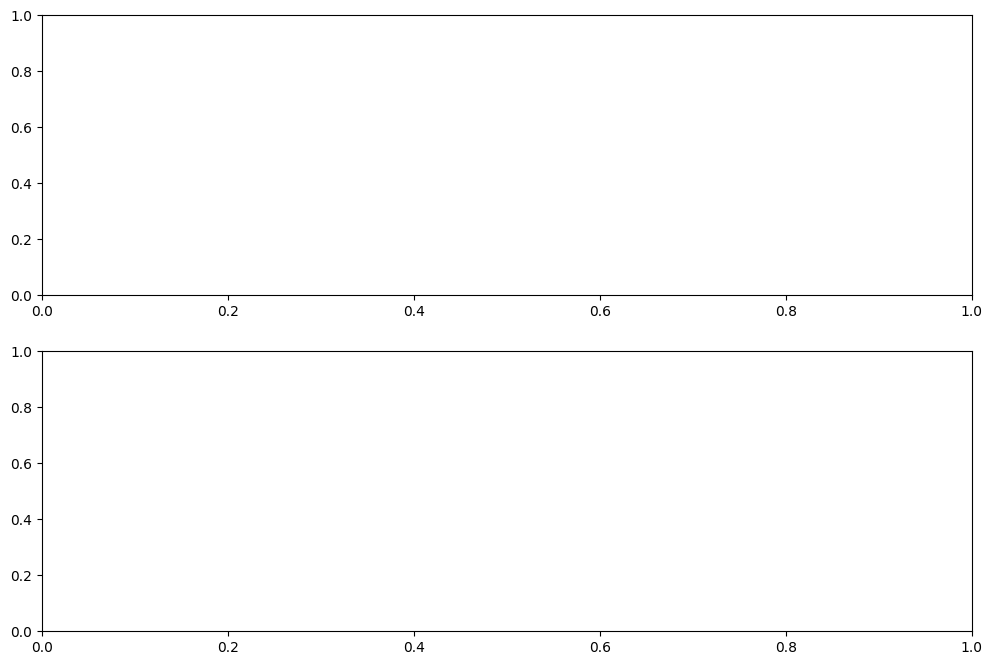

In [3]:
fig, axarr = plt.subplots(2,1,figsize=(12,8))

In [4]:
# axarr a list of axesSubplot object
print(axarr)


[<AxesSubplot:> <AxesSubplot:>]


To tell pandas which subplot we want a new plot to go in-the first one or the second one-we need to grab the proper
axis out of the list and pass it into pandas via the ax parameter:


In [5]:
# first plot is the vin review point
reviews['points'].value_counts().sort_index().plot.bar(ax=axarr[0])
# second plot is the vin province
reviews['province'].value_counts().head(20).plot.bar(ax=axarr[1])
plt.show()

## 4.2 Create a 2*2 subplot



NameError: name 'sns' is not defined

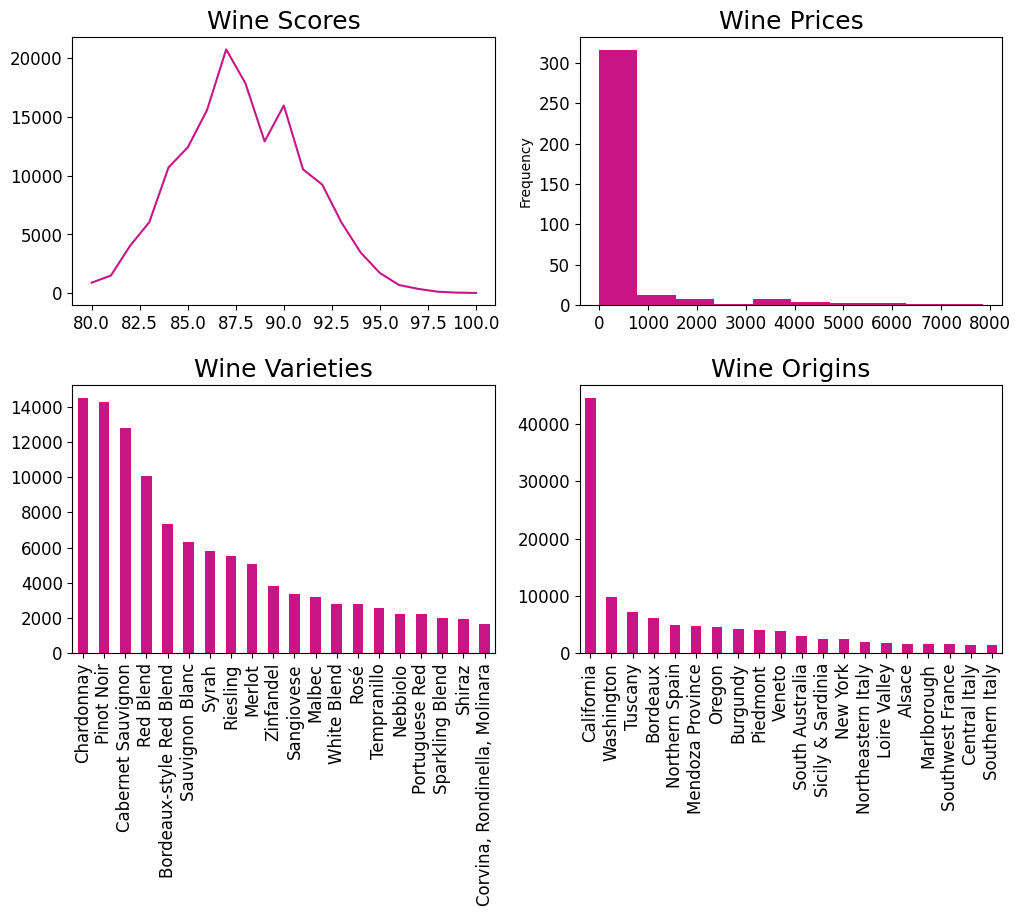

In [6]:
my_fig, my_axarr= plt.subplots(2,2,figsize=(12,8))

# fig score
reviews['points'].value_counts().sort_index().plot.line(ax=my_axarr[0][0], fontsize=12, color='mediumvioletred')
my_axarr[0][0].set_title("Wine Scores", fontsize=18)

# fig variety
reviews['variety'].value_counts().head(20).plot.bar(ax=my_axarr[1][0], fontsize=12, color='mediumvioletred')
my_axarr[1][0].set_title("Wine Varieties", fontsize=18)

# fig origin
reviews['province'].value_counts().head(20).plot.bar(ax=my_axarr[1][1], fontsize=12, color='mediumvioletred')
my_axarr[1][1].set_title("Wine Origins", fontsize=18)

# fig prices
reviews['price'].value_counts().plot.hist(ax=my_axarr[0][1], fontsize=12, color='mediumvioletred')
my_axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

sns.despine()

plt.show()